In [1]:
#Importing the required lib.
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [2]:
#Initializing the training and validation generators
train_path = 'DataSet/train'
val_path = 'DataSet/test'
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_path,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [3]:
#Building the convolution network architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(7, activation='softmax'))

In [5]:
#Tarining the Model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001, decay=1e-6), metrics=['accuracy'])
model_history = model.fit(
    train_generator,
    steps_per_epoch=28709 // 64,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=7178 // 64)

Epoch 1/50
448/448 [==============================] - 305s 679ms/step - loss: 1.8003 - accuracy: 0.2623 - val_loss: 1.7059 - val_accuracy: 0.3329
Epoch 2/50
448/448 [==============================] - 231s 515ms/step - loss: 1.6203 - accuracy: 0.3675 - val_loss: 1.5456 - val_accuracy: 0.4021
Epoch 3/50
448/448 [==============================] - 231s 516ms/step - loss: 1.5206 - accuracy: 0.4126 - val_loss: 1.4548 - val_accuracy: 0.4427
Epoch 4/50
448/448 [==============================] - 227s 507ms/step - loss: 1.4483 - accuracy: 0.4439 - val_loss: 1.3955 - val_accuracy: 0.4689
Epoch 5/50
448/448 [==============================] - 223s 499ms/step - loss: 1.3866 - accuracy: 0.4697 - val_loss: 1.3554 - val_accuracy: 0.4812
Epoch 6/50
448/448 [==============================] - 214s 478ms/step - loss: 1.3366 - accuracy: 0.4918 - val_loss: 1.2991 - val_accuracy: 0.5099
Epoch 7/50
448/448 [==============================] - 242s 541ms/step - loss: 1.2899 - accuracy: 0.5089 - val_loss: 1.2664 -

In [6]:
# list all data in history
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


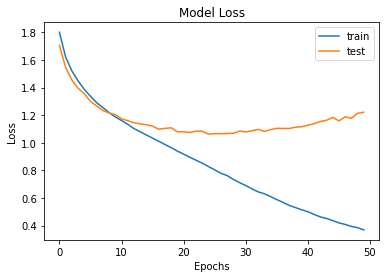

In [7]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','test'])
plt.show()

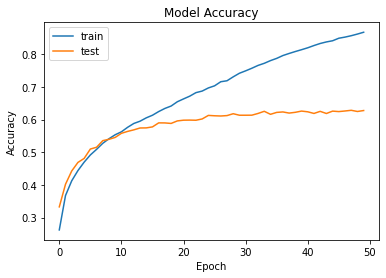

In [8]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [9]:
#Saving the Model Weight
model.save_weights('model.h5')